<a href="https://colab.research.google.com/github/MhdRaihanB/ML_Tasks_MhdRaihanB/blob/main/11thWeekTasks/CNN_CIFAR-10_Muhammad%20Raihan%20B_1103213077.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Raihan Butar-Butar

NIM : 1103213077

Tugas Lecture 11 CNN

Dataset : CIFAR-10

Dokumentasi ChatGPT : https://chatgpt.com/share/2485e381-8df6-4649-a386-171278b436ba

# IMPORT LIBRARY

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# LOAD DATASET

In [20]:
# Memuat dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# PREPROCESSING

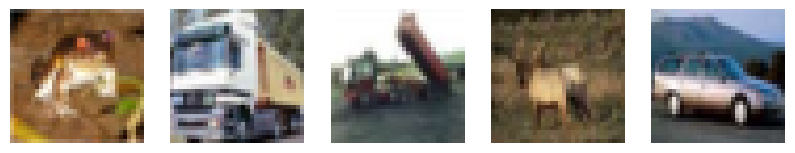

In [21]:
# Normalisasi data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Mengubah label menjadi one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Menampilkan beberapa gambar dari dataset CIFAR-10
fig, axes = plt.subplots(1, 5, figsize=(10, 10))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')
plt.show()

# MODELING

In [22]:
# Membangun Model CNN
model = models.Sequential()

# Layer konvolusi dan pooling pertama
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Layer konvolusi dan pooling kedua
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Layer konvolusi dan pooling ketiga
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Melatih Model
# Mengkompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Menampilkan informasi model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [23]:
# Melatih model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 68s 85ms/step - loss: 1.5799 - accuracy: 0.4183 - val_loss: 1.3680 - val_accuracy: 0.5001
Epoch 2/10
782/782 [==============================] - 68s 87ms/step - loss: 1.2455 - accuracy: 0.5543 - val_loss: 1.2690 - val_accuracy: 0.5487
Epoch 3/10
782/782 [==============================] - 66s 85ms/step - loss: 1.0865 - accuracy: 0.6154 - val_loss: 1.0655 - val_accuracy: 0.6272
Epoch 4/10
782/782 [==============================] - 64s 82ms/step - loss: 0.9790 - accuracy: 0.6555 - val_loss: 0.9746 - val_accuracy: 0.6594
Epoch 5/10
782/782 [==============================] - 62s 80ms/step - loss: 0.9028 - accuracy: 0.6849 - val_loss: 0.9611 - val_accuracy: 0.6641
Epoch 6/10
782/782 [==============================] - 66s 85ms/step - loss: 0.8335 - accuracy: 0.7084 - val_loss: 0.9349 - val_accuracy: 0.6706
Epoch 7/10
782/782 [==============================] - 66s 85ms/step - loss: 0.7792 - accuracy: 0.7291 - val_loss: 0.9421 - val_accuracy:

# EVALUASI MODEL

In [35]:
# Mengevaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 6s - loss: 0.8588 - accuracy: 0.7081 - 6s/epoch - 18ms/step

Test accuracy: 0.7081000208854675


# VISUALISASI MODEL

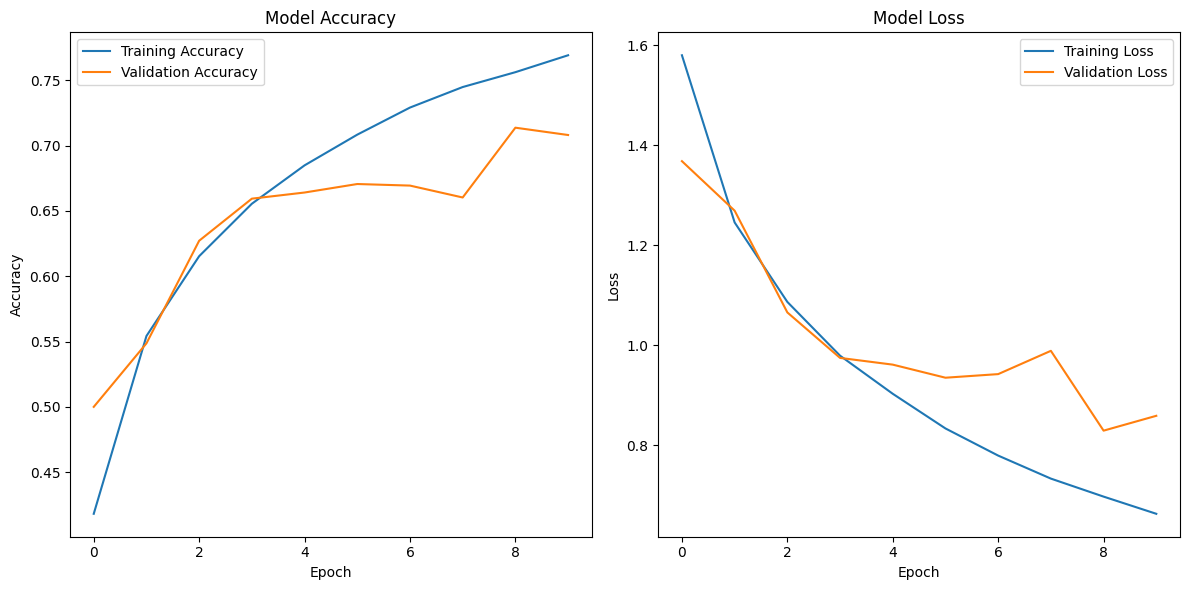

In [28]:
# Menampilkan visualisasi model accuracy dan model loss dalam satu baris dengan dua kolom
plt.figure(figsize=(12, 6))

# Visualisasi model accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Visualisasi model loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 [==============================] - 5s 15ms/step


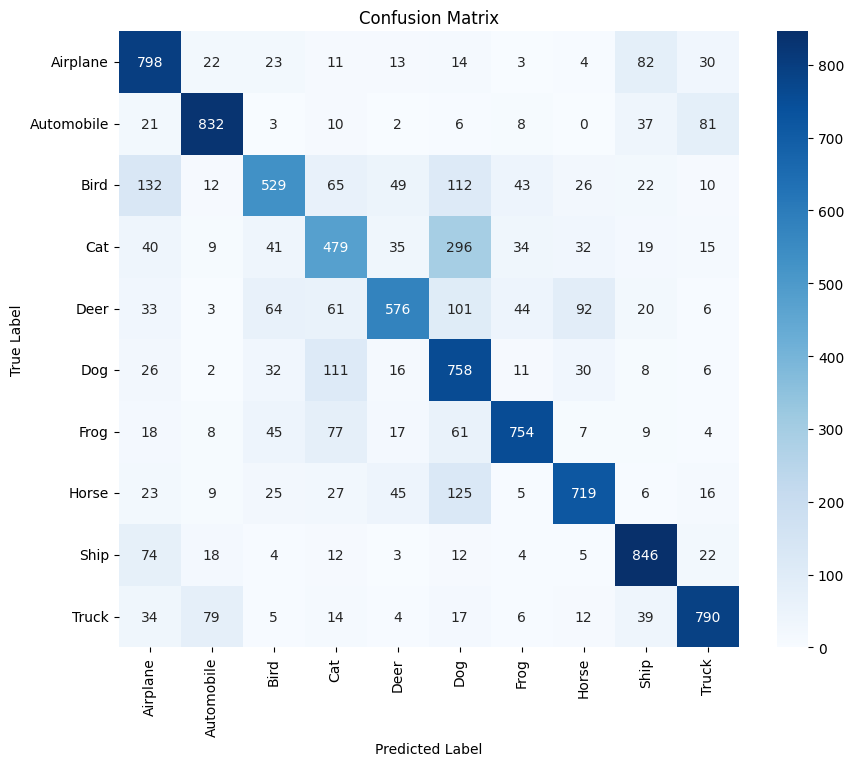

In [32]:
# Memprediksi kelas dari data uji
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Menghitung confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Menampilkan confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

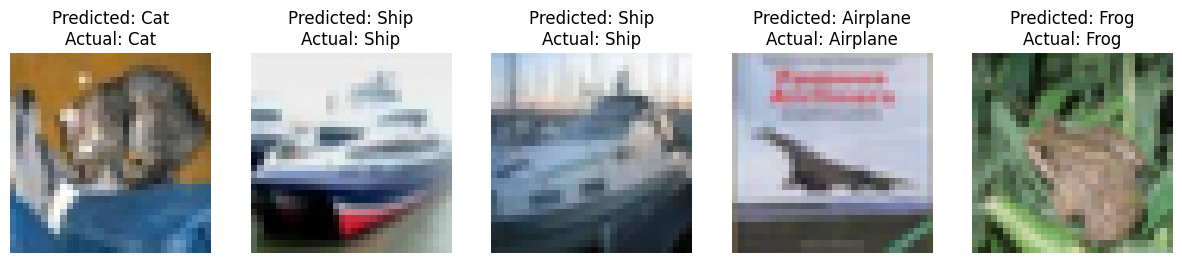

In [34]:
# Menampilkan prediksi gambar
num_images = 5
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {class_names[y_pred[i]]}\nActual: {class_names[np.argmax(y_test[i])]}")
    plt.axis('off')

plt.show()